Importation of modules and functions
===

In [1]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import datetime
import random
import warnings

# Functions
sys.path.insert(0, './implementations/')
from implementations import *
from preprocessing import *
from pca import *
from plot import *
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)

Data loading
===

In [2]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")

Data filtering and standardization
===

In [3]:
# Spliting the data into train and test sets
tx, y, tx_t, y_t = split_data(data_raw, labels_raw)

# Filtering features, missing values and outliers
tx, tx_t = process_data(tx, tx_t)

# Performing PCA
print("Performing PCA and keeping feature explaining 95% of the variance")  
eigVal, eigVec, sumEigVal = PCA(tx, threshold = 0.95)
tx = tx.dot(eigVec)
tx_t = tx_t.dot(eigVec)
print("Reducing the number of PCA to {0}".format(eigVec.shape[1]))

# Adding bias column
print("Adding a columns of ones to the dataset")
y, tx = build_model_data(tx, y)
y_t, tx_t = build_model_data(tx_t, y_t)

Filtering features
Finding and replacing outliers by column mean
Replacing NaN points with feature mean value
Standerizing the data
Performing PCA and keeping feature explaining 95% of the variance
Reducing the number of PCA to 21
Adding a columns of ones to the dataset


Linear regression with gradient descent (GD)
===

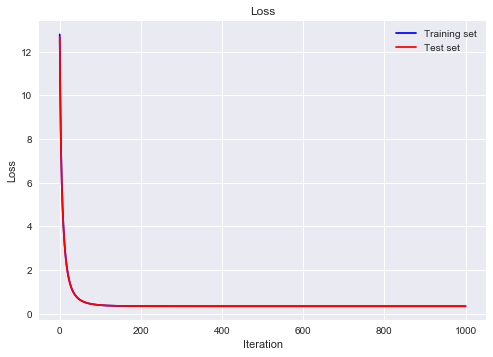

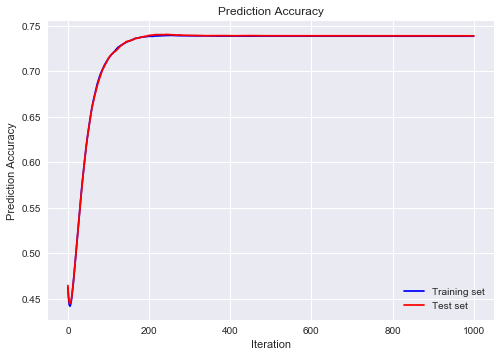

In [4]:
initial_w = np.ones(tx.shape[1])

# Perform linear regression by gradient descent
loss_tr, loss_ts, acc_tr, acc_ts, ws = least_squares_GD(y, tx, y_t, tx_t, initial_w, gamma = 0.05, k=0, max_iters = 1000)


plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

Linear regression with stochastic gradient descent (SGD)
===

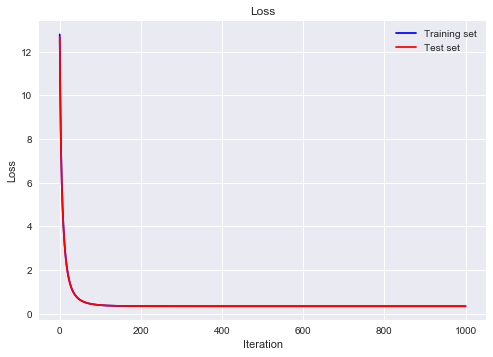

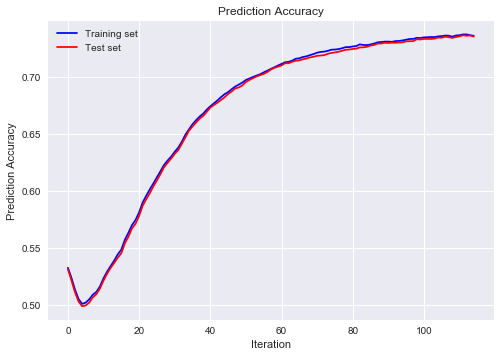

In [5]:
initial_w = np.random.rand(tx.shape[1])

# Perform linear regression by stochastic gradient descent
losses_tr, losses_ts, acc_tr, acc_ts, w = least_squares_SGD(y, tx, y_t, tx_t, initial_w, max_iters = 250, tol = 1e-4, patience = 5)

plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)


Linear regression using least squares normal equations
===

In [6]:
# Perform least squares equations
w = least_squares(y, tx)

# Predicing accuracy for train set
train_pred_lab = predict_labels(w, tx)
acc_tr = pred_accuracy(train_pred_lab, y)

# Predicing accuracy for test set
test_pred_lab = predict_labels(w, tx_t)
acc_ts = pred_accuracy(test_pred_lab, y_t)

# Computing loss for both sets
loss_tr = np.sqrt(2 * compute_loss(y, tx, w))
loss_ts = np.sqrt(2 * compute_loss(y_t, tx_t, w))

print("train loss : {0} | test loss : {1}".format(loss_tr,loss_ts))
print("train accuracy : {0} \t | test accuracy : {1}".format(acc_tr,acc_ts))


train loss : 0.8306308159745184 | test loss : 0.8322191806433329
train accuracy : 0.738685 	 | test accuracy : 0.73908


Linear regression using the normal equations with additional polynomial degrees
===

degree: 1 	 rmse_ts: 0.8322191806433329 	  pred_ts: 0.73908
degree: 2 	 rmse_ts: 0.787057635478692 	  pred_ts: 0.784
degree: 3 	 rmse_ts: 0.782321823568777 	  pred_ts: 0.78654
degree: 4 	 rmse_ts: 0.774907523916673 	  pred_ts: 0.79144
degree: 5 	 rmse_ts: 0.7723723046255447 	  pred_ts: 0.79346
degree: 6 	 rmse_ts: 0.7719177825738435 	  pred_ts: 0.7939
degree: 7 	 rmse_ts: 0.7711138003929955 	  pred_ts: 0.79408
degree: 8 	 rmse_ts: 0.7701917079755563 	  pred_ts: 0.7942
degree: 9 	 rmse_ts: 0.7708773529131183 	  pred_ts: 0.7947


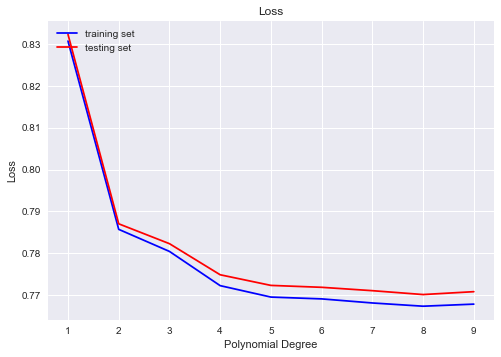

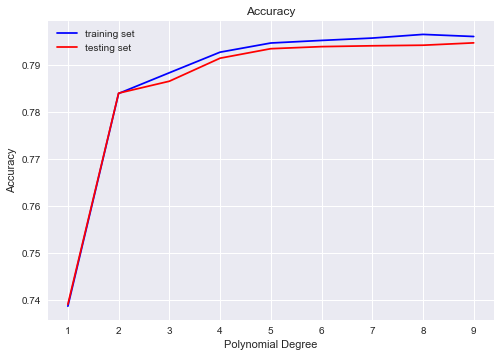

In [7]:
degrees = range(1,10)
rmse_tr = np.zeros(len(degrees))
rmse_ts = np.zeros(len(degrees))
pred_tr = np.zeros(len(degrees))
pred_ts = np.zeros(len(degrees))

# Performing least squares with different degrees
for ind, degree in enumerate(degrees):
    
    # Build polynomial model
    tx_poly = build_poly(tx,degree)
    tx_t_poly = build_poly(tx_t,degree)
    
    # Perform least squares equations
    w = least_squares(y, tx_poly)
    
    # Compute loss and accuracy of the train set
    rmse_tr[ind] = (np.sqrt(2 * compute_loss(y, tx_poly, w)))
    pred_tr[ind] = pred_accuracy(predict_labels(w, tx_poly), y)
    
    # Compute loss and accuracy of the test set
    rmse_ts[ind] = (np.sqrt(2 * compute_loss(y_t, tx_t_poly, w)))
    pred_ts[ind] = (pred_accuracy(predict_labels(w, tx_t_poly), y_t))
    
    print("degree: {d} \t rmse_ts: {a} \t  pred_ts: {b}".format(d = degree, a = rmse_ts[ind], b = pred_ts[ind]))

    

# Plot the loss
plt.style.use('seaborn')
plt.plot(degrees,rmse_tr, c='blue')
plt.plot(degrees,rmse_ts, c='red')
plt.title('Loss')
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()

# Plot the accuracy
plt.style.use('seaborn')
plt.plot(degrees,pred_tr, c='blue')
plt.plot(degrees,pred_ts, c='red')
plt.title('Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()


Linear regression using ridge regression
===

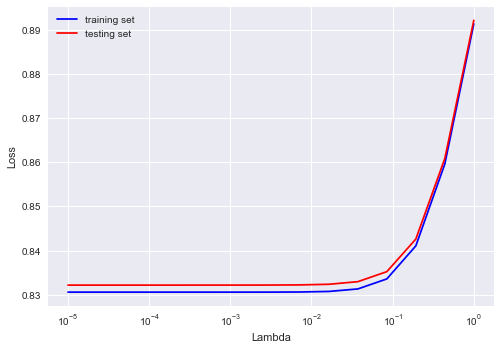

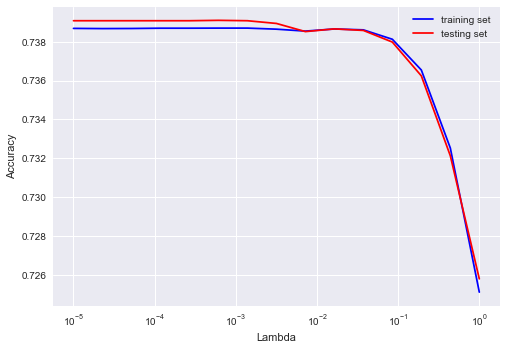

In [8]:
lambdas = np.logspace(-5, 0, 15)
rmse_tr = []
rmse_ts = []
pred_tr = []
pred_ts = []

# Perform a grid search for the lambda parameter of ridge regression
for ind, lambda_ in enumerate(lambdas):
    
    # Perform ridge regression
    w = ridge_regression(y, tx, lambda_)
    
    # Compute loss and accuracy of the train set
    rmse_tr.append(np.sqrt(2 * compute_loss(y, tx, w)))
    pred_tr.append(pred_accuracy(predict_labels(w, tx),y))
    
    # Compute loss and accuracy of the test set
    rmse_ts.append(np.sqrt(2 * compute_loss(y_t, tx_t, w)))
    pred_ts.append(pred_accuracy(predict_labels(w, tx_t),y_t))
    
plt.style.use('seaborn')
plt.semilogx(lambdas,rmse_tr, c='blue')
plt.semilogx(lambdas,rmse_ts, c='red')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred_tr, c='blue')
plt.semilogx(lambdas,pred_ts, c='red')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper right')
plt.show()

# Logistic regression using gradient descent and stochastic gradient descent

## Gradient Descent


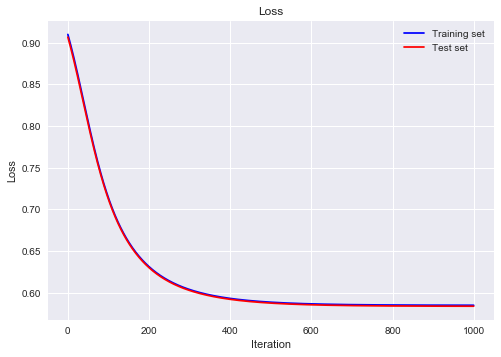

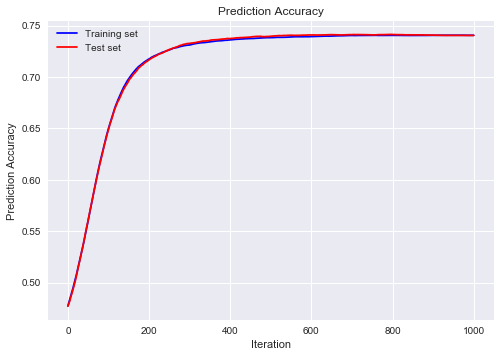

In [9]:
initial_w = np.random.rand(tx.shape[1])

# Perform logistic regression using gradient descent
loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_regression(y, tx, y_t, tx_t, initial_w, method = 'gd', max_iters = 1000, gamma = 0.05) 


plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

## Stochastic Gradient Descent

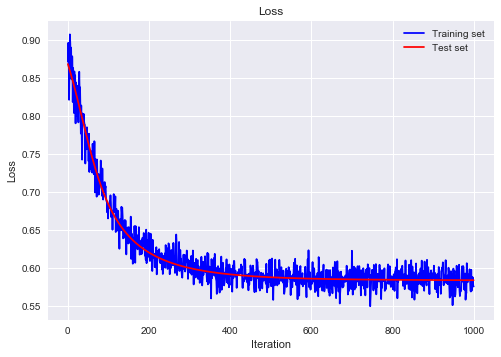

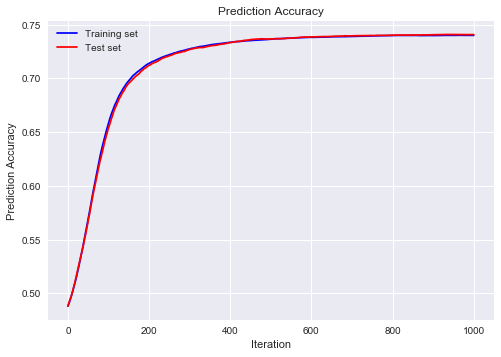

In [10]:
initial_w = np.random.rand(tx.shape[1])

# Perform logistic regression using stochastic gradient descent
loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_regression(y, tx, y_t, tx_t, initial_w, method = 'sgd', max_iters = 1000, gamma = 0.05) 


plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

# Regularized Logistic Regression

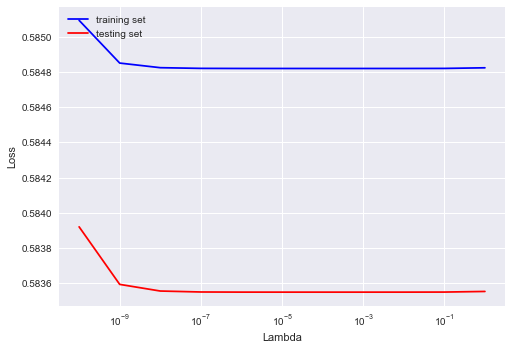

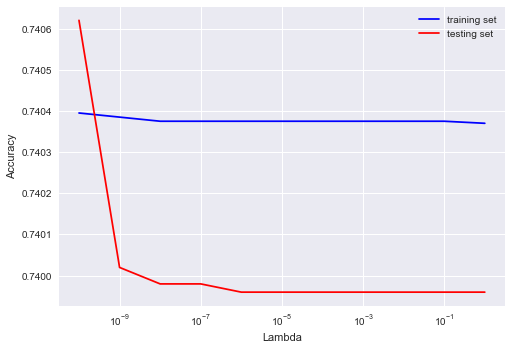

In [25]:
lambdas = np.logspace(-10,0, 11)

losses_tr = []
losses_ts = []
pred_tr = []
pred_ts = []

initial_w = np.random.rand(tx.shape[1])

# Performing grid search for lambda parameter
# There is a runtime warning but just be patient
for ind, lambda_ in enumerate(lambdas):
    
    # Performing regularized ridge regression
    loss_tr, loss_ts, acc_tr, acc_ts, w = reg_logistic_regression(y, tx, y_t, tx_t, initial_w, lamb = lambda_, method ='gd', gamma = 0.05, max_iters=1000)
    
    # Appending loss and accuracy for train set
    losses_tr.append(loss_tr[-1])
    pred_tr.append(acc_tr[-1])
    
    # Appending loss and accuracy for test set
    losses_ts.append(loss_ts[-1])
    pred_ts.append(acc_ts[-1])

    

plt.style.use('seaborn')
plt.semilogx(lambdas,losses_tr, c='blue')
plt.semilogx(lambdas,losses_ts, c='red')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred_tr, c='blue')
plt.semilogx(lambdas,pred_ts, c='red')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper right')
plt.show()

# Logistic regression using Newton's method

The Newton's Method helps us compute the logistic regression faster.
Note that the learning rate is increased and that this function has the lembda parameter that allows
it to be regularizer or not (lam =0)

25/200	 train acc : 0.739605 	 | test acc : 0.73952
50/200	 train acc : 0.740395 	 | test acc : 0.73992
75/200	 train acc : 0.74037 	 | test acc : 0.73996
100/200	 train acc : 0.740375 	 | test acc : 0.73996


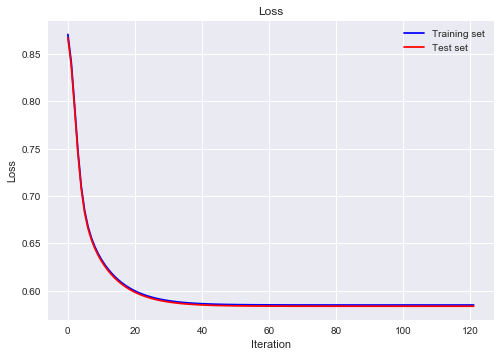

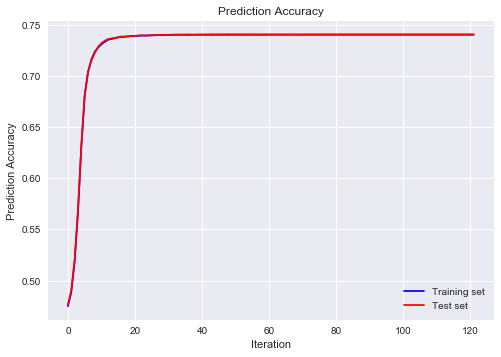

In [14]:
initial_w = np.zeros(tx.shape[1])

# Performing logistic regression with Newton's method
loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_hessian(y, tx, y_t, tx_t, initial_w, gamma=0.05, lam=1e-10, max_iters=200) 

plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

# Varying Learning Rate (gamma) with Logistic Regression

Tests logistic regression with three different learning rates, one too small, one normal and one too large.

We see that with a small learning rate we need many iterations to converge while we risk divergence with a learning rate too large.

Learning rate : 0.001


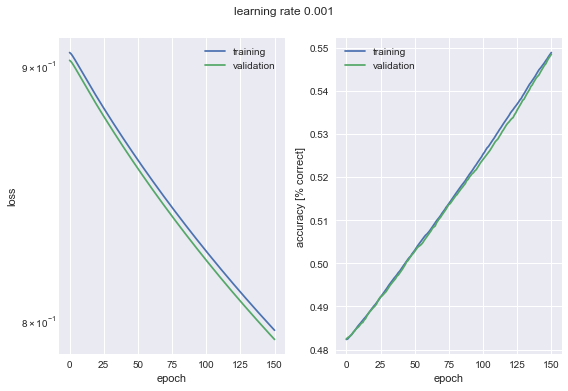

Learning rate : 0.05


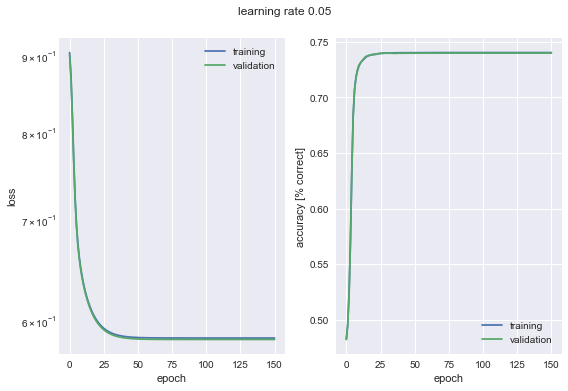

Learning rate : 1


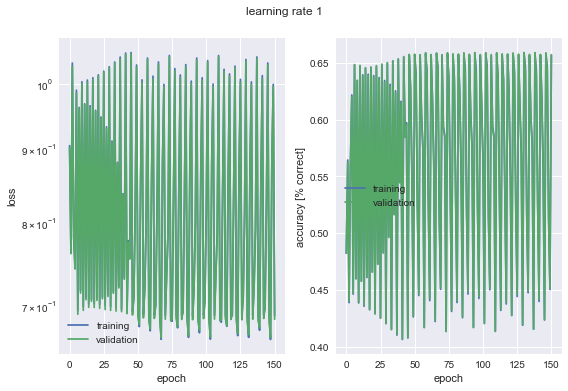

In [24]:
num_iter = 1000
lr = [0.001, 0.05, 1] 

initial_w = np.zeros(tx.shape[1])

# Performing a small grid search on the learning rate
for i in range(len(lr)):
    print("Learning rate : {0}".format(lr[i]))
    loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_hessian(y, tx, y_t, tx_t, initial_w, gamma=lr[i], lam=1e-10, max_iters=150, tol = 0, writing = False) 
    
    titre = "learning rate "+str(lr[i])
    plt.show(plotCurves(loss_tr, acc_tr, loss_ts, acc_ts, titre))


